# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the NSL simulator code to print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. Make pictures of these statistical uncertainties as a function of $L$. What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Exercise 07.3

Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and perform MC NVT simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ...  and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.

----
## Risoluzione
----
La risoluzione di tutti gli esercizi proposti ha sempre, più o meno esplicitamente, previsto l'utilizzo di numeri randomici, o meglio, **Pseudo-Casuali** forniti sempre dalla libreria `random.cpp`. Occore quindi chiedersi quanto la non completa randomicità dei numeri generati possa influire sui risultati ottenuti tramite **data-blocking**. Questo analisi statistica è stata svolta sulle misure di **Energia Interna per particella** $U/N$ nelle presenti simulazioni di **Dinamica Molecolare** svolte con $M=5\cdot10^5$ blocchi da un singolo step.

Queste misure hanno permesso di valutare l'**Autocorrelazione** dei valori di $U/N$. L'autocorrelazione è una funzione che descrive la correlazione tra elementi di una stessa serie temporale in funzione del tempo $t$ che li separa ed è quindi in generale definita da:
$$\chi(t)=\frac{\langle m(t')m(t'+t)\rangle_{t'}-\langle m \rangle^2}{\sigma_m^2}$$
Data una catena di Markov a tempo discreto per una certa osservabile $m$, l'autocorellazione è data da:
$$\chi(t)=\frac{\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t')m(t'+t)-\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t')\cdot\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t'+t)}{\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}m^2(t')-\left(\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}m(t')\right)^2}$$
L'esecuzione di questa simulazione ha permesso anche di confrontare l'incertezza del data-blocking variando il numero di blocchi in cui uno stesso set di misure viene suddiviso. La conoscenza dell'autocorrelazione e dell'incertezza può fornire quindi un'indicazione su quale sia la strategia di data-blocking migliore al fine di avere una misura accurata di un processo che possa essere assunto Markoviano.

Vengono riportati sotto i risultati della simulazione e dell'analisi.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import acf

In [2]:
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [8.0, 6.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':20,
    'savefig.directory':'./Images'
})

In [3]:
dir = ['Gas','Liquid','Solid']
type = dir
r_cut = [5.0,2.5,2.2]
color = ['red','green','blue']

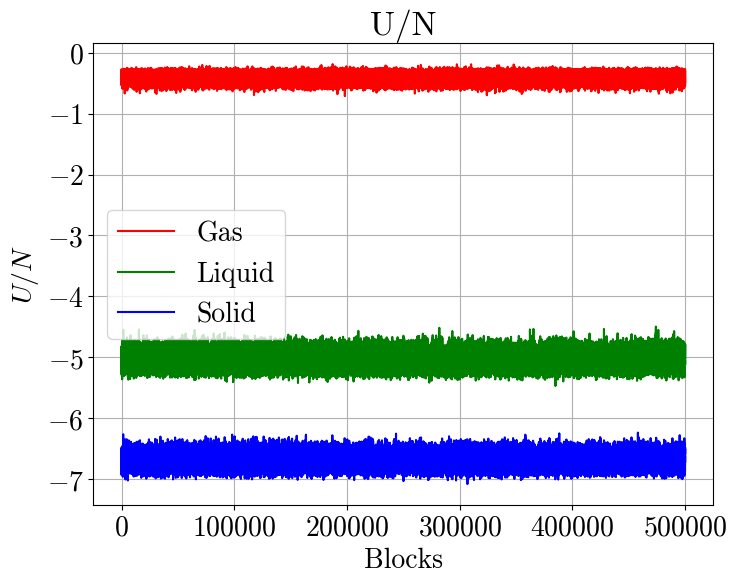

In [24]:
for k in range(0,3):
    df_temp = pd.read_csv('OUTPUT/'+dir[k]+'/Statistic/potential_energy.dat',sep='\t')
    x=df_temp.iloc[:,0]
    y=df_temp.iloc[:,1]
    plt.plot(x,y,label=type[k],color=color[k])
plt.title('U/N')
plt.ylabel('$U/N$')
plt.xlabel('Blocks')
plt.legend(loc='center left')
plt.grid(True)
plt.show()

Misure di $U/N$ nelle simualzioni nelle tre fasi diverse corrispondenti al "valor medio" interno di ciascuno dei $5\cdot10^5$ blocchi unitari 

In [5]:
chi=np.zeros([201,3])
for k in range(0,3):
    df_temp = pd.read_csv('OUTPUT/'+dir[k]+'/Statistic/potential_energy.dat',sep='\t')
    x=df_temp.iloc[:,0]
    y=df_temp.iloc[:,1]
    err=df_temp.iloc[:,3]
    chi[:,k] = acf(y,nlags=200)

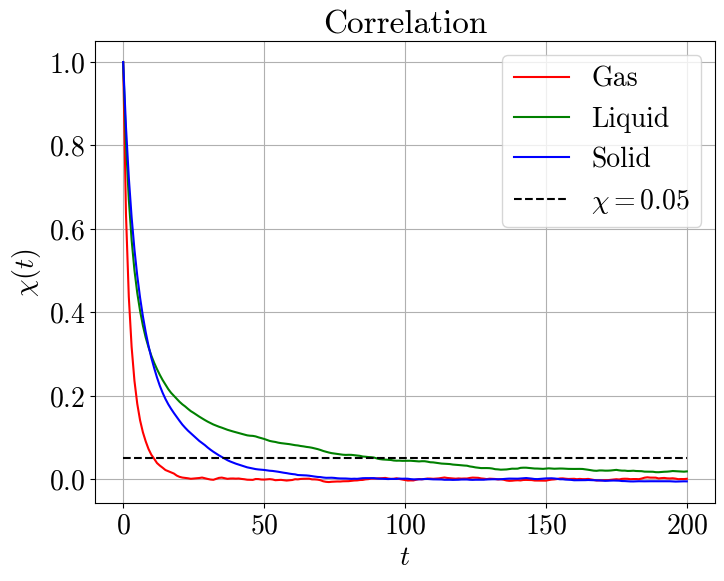

In [23]:
for k in range(0,3):
    x = np.arange(201)
    plt.plot(x,chi[:,k],label=type[k],color=color[k])
plt.hlines(0.05,0,x[-1],linestyles='--',color='black',label='$\chi=0.05$')
plt.xlabel('$t$')
plt.ylabel('$\chi(t)$')
plt.title('Correlation')
plt.legend()
plt.grid()
plt.show()

L'**Autocorrelazione** nelle misure di $U/N$ mostra un tipico decadimento circa esponenziale con diversi tempi caratteristici a seconda della fase. Si nota come il decadimento nel caso di fase liquida sia più lento ma qualitativamente monotono. È possibile quindi identificare, fissato una target di autocorellazione massima, un numero minimo di step da far intercorrere che sia adatto per tutte tre le fasi: con un'autocorellazione massima $\chi=0.05$, $100$ step sono largamente sufficienti nel caso delle fasi **Solida** e **Gassosa** per raggiungere il target, lo sono comunque ma con minor margine anche nel caso della fase **Liquida**.

Questa informazione ci fornisce quindi il numero minimo di step di cui un blocco deve essere costituito affinchè sia scorrelato dal succesivo. Chiaramente fissando un target più restrittivo sull'autocorrelazione, questo numero aumenta esponenzialmente

In [7]:

N=[50000,25000,20000,10000,7500,5000,4000,2500,2000,1000,750,500,400,250,200,100]#[100,250,500,1000,2500,5000,10000,25000,50000]
L=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
st=np.zeros([len(N),3])

In [8]:
for k in range(0,3):
    stat = pd.read_csv('OUTPUT/'+dir[k]+'/Statistic/potential_energy.dat',sep='\t')
    x=stat.iloc[:,0]
    y=stat.iloc[:,1]
    err=stat.iloc[:,3]

    for m in range(0,len(N)):
        c=0.
        c2=0.
        t=0.
        t2=0.
        y_b=np.zeros(N[m])
        y2=np.zeros(N[m])
        e_b=np.zeros(N[m])
        blk= np.arange(N[m])+1
        L[m]=int(len(x)/N[m])
        for i in range(0,N[m]):
            for j in range(0,L[m]):
                c+=y[L[m]*i+j]
            c/=L[m]
            #c2/=L[m]
            t+=c
            t2+=c**2
            y_b[i]=t/(i+1)
            y2[i]=t2
            c=0.
            c2=0.
            e_b[i]=np.sqrt((y2[i]/(i+1) - y_b[i]**2)/(i+1))
        st[m,k]=e_b[-1]


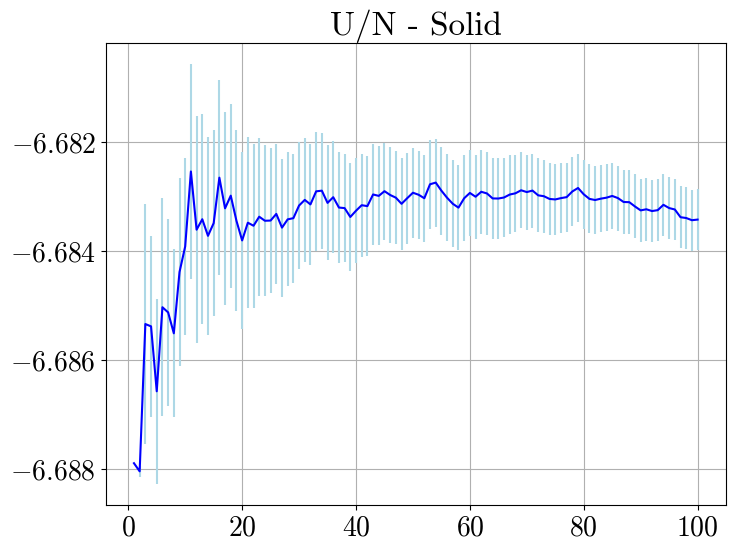

In [9]:
plt.errorbar(blk,y_b,e_b,color='blue',ecolor='lightblue')
plt.title('U/N - '+type[k])
plt.grid()
plt.show()

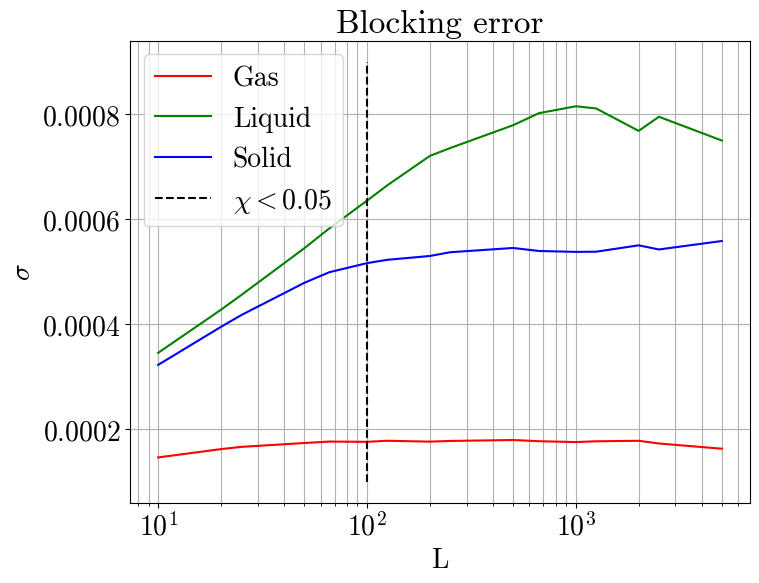

In [32]:
plt.title('Blocking error')
for k in range(0,3):
    plt.plot(L,st[:,k],label=type[k],color=color[k])
#plt.yscale('log')
plt.vlines(100,0.0001,0.0009,color='black',linestyles='--',label='$\chi<0.05$')
plt.xscale('log')
plt.xlabel('L')
plt.legend()
plt.ylabel('$\sigma$')
plt.grid(True, which='both')
plt.show()

Per quanto riguarda l'**Incertezza** nel data-blocking si può osservare un comportamento generale per cui è minima per numero di step per blocco $L=10$ per tutte e tre le fasi e delle flessioni diverse per $L>10^3$ al variare della fase. Il risultato ottimale di questo studio è però da coniugare con il risultato sullo studio dell'**Autocorrelazione** che abbiamo visto richiedere un numero minimo di step per blocco pari a $L=100$ come rappresenentato nel grafico.

L'andamento variabile dell'incertezza per $L$ grandi non ci permette di identificare una suddivisione in blocchi che sia universalmente ottimale, tuttavia, possiamo conludere che suddividere il set di misure in blocchi da $100$ step sia un buon compromesso tra l'incertezza e l'autocorrelazione.

### 7.3
Nella libreria `system.cpp` sono state aggiunte le correzioni per l'Energia Interna $U$ e la Pressione $p$ che si basano sulla conoscenza della **Distribuzione Radiale di Probabilità** $g(r)$. In particolare le seguenti espressioni per le correzioni sulle code in presenza di un potenziale di **Lennard-Jones** si basano sull'assunzione che $g(r)\approx1$ per $r>r_{cut}$:
$$\frac{\langle V_{LJ}\rangle_{tail}}{N}=8\pi\rho_{LJ}\varepsilon\left[\frac{1}{9}\left(\frac{\sigma}{r_c}\right)^9-\frac{1}{3}\left(\frac{\sigma}{r_c}\right)^3\right]$$
$$\frac{\langle w_{LJ}\rangle_{tail}}{3N\varepsilon}=32\pi\rho_{LJ}\left[\frac{1}{9}\left(\frac{\sigma}{r_c}\right)^9-\frac{1}{6}\left(\frac{\sigma}{r_c}\right)^3\right]$$
Oltre ad aggiungere tali correzioni è stato implementato anche un metodo per calcora la distribuzione $g(r)$ di cui vengono riportati i grafici confrontando le simulazioni **Ensamble Microcanonico (NVE)** e quelle in **Ensamble Canonico (NVT)**.

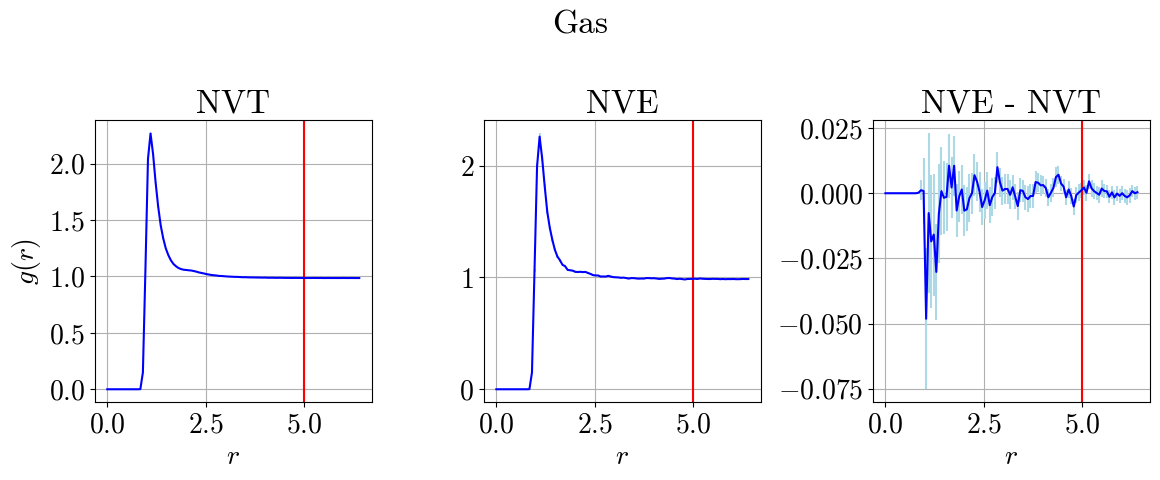

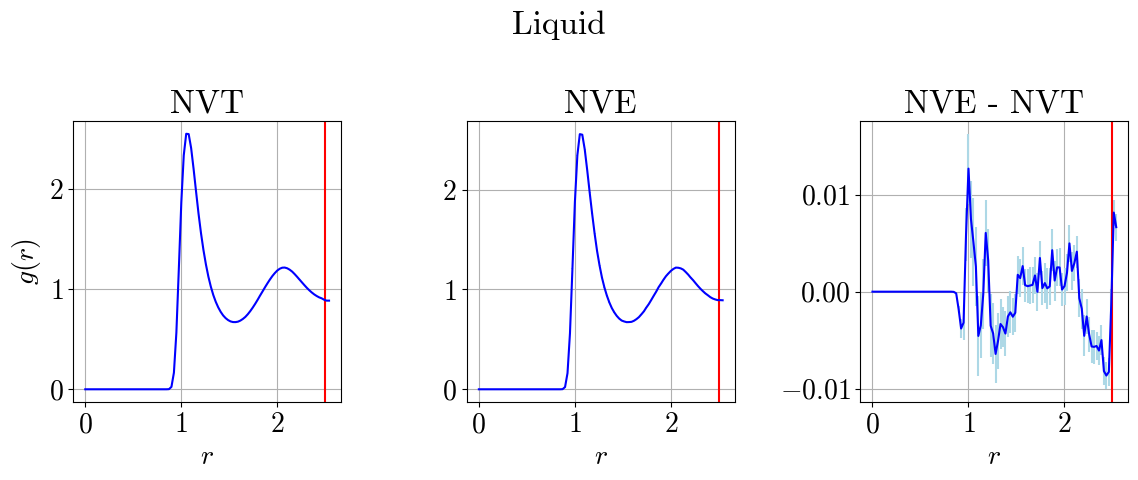

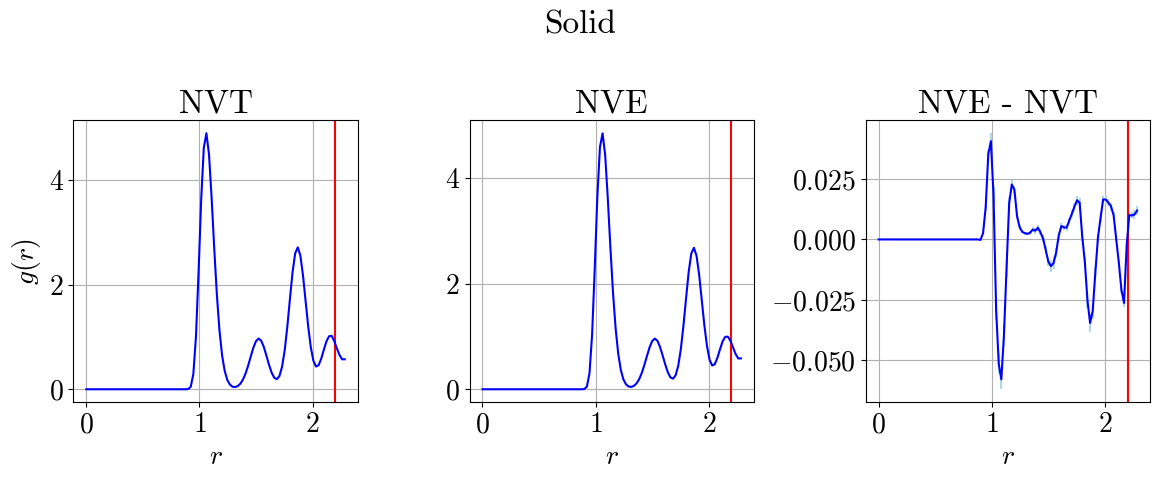

In [11]:
x=np.zeros([100,3])
y1=np.zeros([100,3])
y2=np.zeros([100,3])
e1=np.zeros([100,3])
e2=np.zeros([100,3])
for k in range(0,3):
    plt.figure(figsize=(12,5))
    df_nve = pd.read_csv('OUTPUT/'+dir[k]+'/NVE/gofr.dat',sep='\t')
    df_pres = pd.read_csv('OUTPUT/'+dir[k]+'/NVT/gofr.dat',sep='\t')
    x[:,k]=df_pres.iloc[:,0]
    y1[:,k]=df_nve.iloc[:,1]
    y2[:,k]=df_pres.iloc[:,1]
    e1[:,k]=df_nve.iloc[:,2]
    e2[:,k]=df_pres.iloc[:,2]
    plt.suptitle(type[k])
    # NVT
    plt.subplot(1,3,1)
    plt.errorbar(df_pres.iloc[:,0],df_pres.iloc[:,1],df_pres.iloc[:,2],color='blue',ecolor='lightblue',label='$g(r)$')
    plt.axvline(x=r_cut[k],color='red',label='$R_{cut}$')
    plt.ylabel('$g(r)$')
    plt.xlabel('$r$')
    plt.title('NVT')
    plt.grid(True)
    # NVE
    plt.subplot(1,3,2)
    plt.errorbar(df_nve.iloc[:,0],df_nve.iloc[:,1],df_nve.iloc[:,2],color='blue',ecolor='lightblue',label='$g(r)$')
    plt.axvline(x=r_cut[k],color='red',label='$R_{cut}$')
    #plt.ylabel('$g(r)$')
    plt.xlabel('$r$')
    plt.title('NVE')
    plt.grid(True)
    # comparison
    plt.subplot(1,3,3)
    plt.errorbar(df_nve.iloc[:,0],df_nve.iloc[:,1]-df_pres.iloc[:,1],df_nve.iloc[:,2],color='blue',ecolor='lightblue',label='$g(r)$')
    plt.axvline(x=r_cut[k],color='red',label='$R_{cut}$')
    #plt.ylabel('$g(r)$')
    plt.xlabel('$r$')
    plt.title('NVE - NVT')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Si può osservare come l'assunzione di $g(r)\approx1$ per $r>r_{cut}$(rappresentato dalla linea rossa) sia pienamente ragionevole solo nel caso di fase gassosa. Si nota in generale anche un discostamento via via più ampio della $g(r)$ tra **NVE** e **NVT**: questo discostamento è ragionevole per le differenze tra i due **Ensamble** che sono tanto più marcate tanto più le particelle sono tra loro interagenti e l'Energia non unicamente termica.  